In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox


In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls Dec_aCSV1.csv')
ff = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls nov_aCSV1.csv')
pp = pd.read_csv('/content/drive/MyDrive/IPBills-Az/ip bills.xls oct_aCSV1.csv')
df = pd.concat([dd, ff, pp], axis=0)
df.reset_index(drop=True, inplace=True)
df


,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category
0,1,Ip Bill,IP,2504,01-12-2019 10:18,20050,0.0,20050,20050,0,CASH,brundha s-csh,142857,2494,NaN
1,2,Ip Bill,IP,2505,01-12-2019 10:33,5235,0.0,5235,5235,0,CASH,brundha s-csh,468092,2501,NaN
2,3,Ip Bill,IP,2506,01-12-2019 12:32,1995,0.0,1995,1995,0,CARD,brundha s-csh,170560,2498,NaN
3,4,Ip Bill,IP,2507,01-12-2019 13:42,13085,0.0,13085,13085,0,CARD,brundha s-csh,474228,2482,NaN
4,5,Ip Bill,IP,2508,01-12-2019 14:26,14120,NaN,14120,14120,0,TPA,brundha s-csh,473777,2486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31180,7626,Reg/Cons,OP,552473,31-10-2019 17:31,830,0.0,830,830,0,CARD,shalet d souza-opd,473615,0,NaN
31181,7627,Reg/Cons,OP,552474,31-10-2019 17:55,530,0.0,530,530,0,CASH,shalet d souza-opd,473438,0,NaN
31182,7628,Reg/Cons,OP,552475,31-10-2019 18:03,230,0.0,230,230,0,CASH,bharathi h-opd,432193,0,NaN
31183,7629,Reg/Cons,OP,552476,31-10-2019 18:43,430,0.0,430,430,0,CARD,bharathi h-opd,297000,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #SlNo           31185 non-null  int64  
 1   Bill Type       31185 non-null  object 
 2   IPOP            31185 non-null  object 
 3   Bill No         31185 non-null  int64  
 4   Bill Date       31185 non-null  object 
 5   Bill Amount     31185 non-null  int64  
 6   Discount        31179 non-null  float64
 7   Net Amount      31185 non-null  int64  
 8   Paid Amount     31185 non-null  int64  
 9   Balance Amount  31185 non-null  int64  
 10  Last Pay Mode   29073 non-null  object 
 11  User            31182 non-null  object 
 12  MRN             31185 non-null  int64  
 13  AdmID           31185 non-null  int64  
 14  Category        2719 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 3.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#SlNo,31185.0,5400.219368,3308.696794,1.0,2599.0,5198.0,7880.0,12534.0
Bill No,31185.0,129265.974090,204825.338622,2065.0,20406.0,38684.0,46499.0,556878.0
Bill Amount,31185.0,1701.686356,9483.195292,0.0,150.0,435.0,1049.0,544015.0
Discount,31179.0,18.342410,661.376718,0.0,0.0,0.0,0.0,91250.0
Net Amount,31185.0,1683.347475,9304.475142,0.0,150.0,435.0,1045.0,544015.0
Paid Amount,31185.0,1594.880231,9268.804003,0.0,105.0,420.0,912.0,544015.0
Balance Amount,31185.0,88.467244,966.715896,-5000.0,0.0,0.0,0.0,121895.0
MRN,31185.0,369873.975405,147741.572581,3245.0,312529.0,454758.0,473626.0,474924.0
AdmID,31185.0,887.049703,1167.970928,0.0,0.0,0.0,2299.0,2717.0


In [ ]:
df.isnull().sum()

,0
#SlNo,0
Bill Type,0
IPOP,0
Bill No,0
Bill Date,0
Bill Amount,0
Discount,6
Net Amount,0
Paid Amount,0
Balance Amount,0


In [ ]:
df.columns

Index(['#SlNo', 'Bill Type', 'IPOP', 'Bill No', 'Bill Date', 'Bill Amount',
       'Discount', 'Net Amount', 'Paid Amount', 'Balance Amount',
       'Last Pay Mode', 'User', 'MRN', 'AdmID', 'Category'],
      dtype='object')

In [ ]:
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format="%d-%m-%Y %H:%M")
df['day'] = df['Bill Date'].dt.day
df['month'] = df['Bill Date'].dt.month
df['year'] = df['Bill Date'].dt.year
df

,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category,day,month,year
0,1,Ip Bill,IP,2504,2019-12-01 10:18:00,20050,0.0,20050,20050,0,CASH,brundha s-csh,142857,2494,NaN,1,12,2019
1,2,Ip Bill,IP,2505,2019-12-01 10:33:00,5235,0.0,5235,5235,0,CASH,brundha s-csh,468092,2501,NaN,1,12,2019
2,3,Ip Bill,IP,2506,2019-12-01 12:32:00,1995,0.0,1995,1995,0,CARD,brundha s-csh,170560,2498,NaN,1,12,2019
3,4,Ip Bill,IP,2507,2019-12-01 13:42:00,13085,0.0,13085,13085,0,CARD,brundha s-csh,474228,2482,NaN,1,12,2019
4,5,Ip Bill,IP,2508,2019-12-01 14:26:00,14120,NaN,14120,14120,0,TPA,brundha s-csh,473777,2486,NaN,1,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31180,7626,Reg/Cons,OP,552473,2019-10-31 17:31:00,830,0.0,830,830,0,CARD,shalet d souza-opd,473615,0,NaN,31,10,2019
31181,7627,Reg/Cons,OP,552474,2019-10-31 17:55:00,530,0.0,530,530,0,CASH,shalet d souza-opd,473438,0,NaN,31,10,2019
31182,7628,Reg/Cons,OP,552475,2019-10-31 18:03:00,230,0.0,230,230,0,CASH,bharathi h-opd,432193,0,NaN,31,10,2019
31183,7629,Reg/Cons,OP,552476,2019-10-31 18:43:00,430,0.0,430,430,0,CARD,bharathi h-opd,297000,0,NaN,31,10,2019


In [ ]:
df.sort_values(ascending=False, by='Bill Date', inplace=True)
df

,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,Category,day,month,year
5552,5553,Pharmacy,IP,48424,2019-12-31 23:28:00,776,0.0,776,776,0,PREPAID,six flr icu-nur,471846,2522,NaN,31,12,2019
1873,1874,Lab,IP,23926,2019-12-31 23:28:00,2480,0.0,2480,2480,0,TPA,sunitha-lab,257382,2717,UNITED HEALTH CARE PAREKH (UHC),31,12,2019
5871,5872,Pharmacy,IP,48423,2019-12-31 22:58:00,584,0.0,584,584,0,TPA,casuality-cas,257382,2717,UNITED HEALTH CARE PAREKH (UHC),31,12,2019
2295,2296,Pharmacy,OP,48422,2019-12-31 22:49:00,17,0.0,17,17,0,CASH,priyanka-mrd,352871,0,NaN,31,12,2019
8194,8195,Procedure,OP,17670,2019-12-31 22:47:00,400,0.0,400,400,0,CASH,priyanka-mrd,352871,0,NaN,31,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,177,Lab,IP,17817,2019-10-11 01:03:00,2700,0.0,2700,2700,0,PREPAID,midhun v-lab,473086,2071,NaN,11,10,2019
25405,1851,Pharmacy,OP,34373,2019-10-11 00:12:00,50,0.0,50,50,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019
28230,4676,Procedure,OP,13052,2019-10-11 00:09:00,450,0.0,450,450,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019
29667,6113,Reg/Cons,OP,550946,2019-10-11 00:07:00,100,0.0,100,100,0,CASH,john samuel-mrd,473289,0,NaN,11,10,2019


In [ ]:
df['Last Pay Mode'] = df['Last Pay Mode'].fillna(df['Last Pay Mode'].mode()[0])

In [ ]:
df.drop('Category', axis=1, inplace=True)

In [ ]:
df['Discount'] = df['Discount'].fillna(0)
df['Discount'] = df['Discount'].astype(int)

In [ ]:
df

,#SlNo,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,User,MRN,AdmID,day,month,year
5552,5553,Pharmacy,IP,48424,2019-12-31 23:28:00,776,0,776,776,0,PREPAID,six flr icu-nur,471846,2522,31,12,2019
1873,1874,Lab,IP,23926,2019-12-31 23:28:00,2480,0,2480,2480,0,TPA,sunitha-lab,257382,2717,31,12,2019
5871,5872,Pharmacy,IP,48423,2019-12-31 22:58:00,584,0,584,584,0,TPA,casuality-cas,257382,2717,31,12,2019
2295,2296,Pharmacy,OP,48422,2019-12-31 22:49:00,17,0,17,17,0,CASH,priyanka-mrd,352871,0,31,12,2019
8194,8195,Procedure,OP,17670,2019-12-31 22:47:00,400,0,400,400,0,CASH,priyanka-mrd,352871,0,31,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,177,Lab,IP,17817,2019-10-11 01:03:00,2700,0,2700,2700,0,PREPAID,midhun v-lab,473086,2071,11,10,2019
25405,1851,Pharmacy,OP,34373,2019-10-11 00:12:00,50,0,50,50,0,CASH,john samuel-mrd,473289,0,11,10,2019
28230,4676,Procedure,OP,13052,2019-10-11 00:09:00,450,0,450,450,0,CASH,john samuel-mrd,473289,0,11,10,2019
29667,6113,Reg/Cons,OP,550946,2019-10-11 00:07:00,100,0,100,100,0,CASH,john samuel-mrd,473289,0,11,10,2019


In [ ]:
df['Bill Date'].isnull().sum(), df['Net Amount'].isnull().sum()

(0, 0)

In [ ]:
df = df[['Bill Date', 'Net Amount', 'day', 'month', 'year', 'Last Pay Mode']]
df

,Bill Date,Net Amount,day,month,year,Last Pay Mode
5552,2019-12-31 23:28:00,776,31,12,2019,PREPAID
1873,2019-12-31 23:28:00,2480,31,12,2019,TPA
5871,2019-12-31 22:58:00,584,31,12,2019,TPA
2295,2019-12-31 22:49:00,17,31,12,2019,CASH
8194,2019-12-31 22:47:00,400,31,12,2019,CASH
...,...,...,...,...,...,...
23731,2019-10-11 01:03:00,2700,11,10,2019,PREPAID
25405,2019-10-11 00:12:00,50,11,10,2019,CASH
28230,2019-10-11 00:09:00,450,11,10,2019,CASH
29667,2019-10-11 00:07:00,100,11,10,2019,CASH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31185 entries, 5552 to 28684
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill Date      31185 non-null  datetime64[ns]
 1   Net Amount     31185 non-null  int64         
 2   day            31185 non-null  int32         
 3   month          31185 non-null  int32         
 4   year           31185 non-null  int32         
 5   Last Pay Mode  31185 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 1.3+ MB


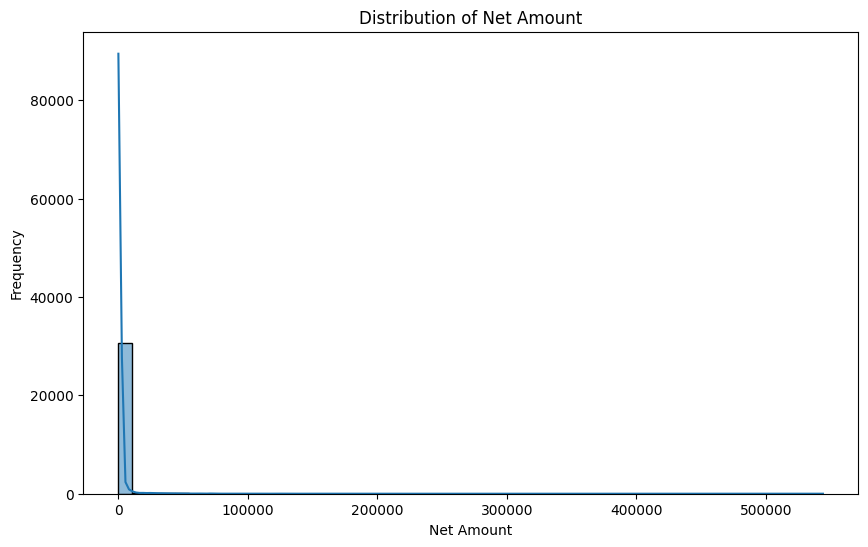

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Net Amount'], bins=50, kde=True)
plt.xlabel("Net Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Net Amount")
plt.show()


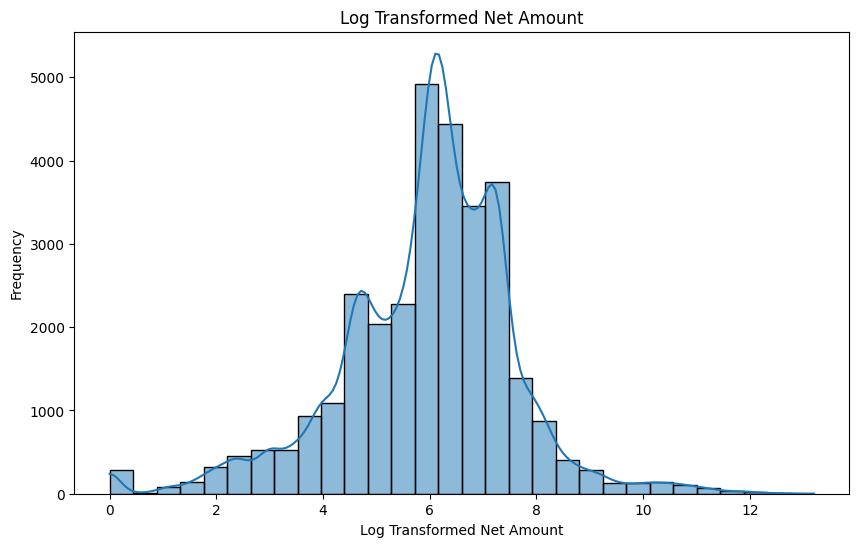

In [ ]:
# if (df['Net Amount'] <= 0).any():
#     shift_value = abs(df['Net Amount'].min()) + 1
#     df['Net Amount Shifted'] = df['Net Amount'] + shift_value
# else:
#     df['Net Amount Shifted'] = df['Net Amount']

# df['Net Amount Transformed'], lambda_value = boxcox(df['Net Amount Shifted'])

# plt.figure(figsize=(10, 6))
# sns.histplot(df['Net Amount Transformed'], bins=30, kde=True)
# plt.xlabel("Transformed Net Amount")
# plt.ylabel("Frequency")
# plt.title(f"Box-Cox Transformed Net Amount (λ={lambda_value:.2f})")
# plt.show()

# print(f"Optimal Lambda: {lambda_value:.4f}")




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined from your original code.
# if it is not, please define it.
# example:
# data = {'Net Amount': [-1, 0, 1, 2, 5, 10, 50, 100]}
# df = pd.DataFrame(data)

if (df['Net Amount'] <= 0).any():
    shift_value = abs(df['Net Amount'].min()) + 1
    df['Net Amount Shifted'] = df['Net Amount'] + shift_value
else:
    df['Net Amount Shifted'] = df['Net Amount']

df['Net Amount Transformed'] = np.log(df['Net Amount Shifted'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Net Amount Transformed'], bins=30, kde=True)
plt.xlabel("Log Transformed Net Amount")
plt.ylabel("Frequency")
plt.title("Log Transformed Net Amount")
plt.show()

In [ ]:
df

,Bill Date,Net Amount,day,month,year,Last Pay Mode,Net Amount Shifted,Net Amount Transformed
5552,2019-12-31 23:28:00,776,31,12,2019,PREPAID,777,6.655440
1873,2019-12-31 23:28:00,2480,31,12,2019,TPA,2481,7.816417
5871,2019-12-31 22:58:00,584,31,12,2019,TPA,585,6.371612
2295,2019-12-31 22:49:00,17,31,12,2019,CASH,18,2.890372
8194,2019-12-31 22:47:00,400,31,12,2019,CASH,401,5.993961
...,...,...,...,...,...,...,...,...
23731,2019-10-11 01:03:00,2700,11,10,2019,PREPAID,2701,7.901377
25405,2019-10-11 00:12:00,50,11,10,2019,CASH,51,3.931826
28230,2019-10-11 00:09:00,450,11,10,2019,CASH,451,6.111467
29667,2019-10-11 00:07:00,100,11,10,2019,CASH,101,4.615121


In [ ]:
# Q1 = df['Net Amount'].quantile(0.25)
# Q3 = df['Net Amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for non-outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# df_cleaned = df[(df['Net Amount'] >= lower_bound) & (df['Net Amount'] <= upper_bound)]

# # Plot histogram of cleaned data
# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned['Net Amount'], bins=30, kde=True)
# plt.xlabel("Net Amount (Outliers Removed)")
# plt.ylabel("Frequency")
# plt.title("Histogram of Net Amount After Removing Outliers")
# plt.show()

# print(f"Original data size: {len(df)}")
# print(f"Cleaned data size: {len(df_cleaned)}")
# print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

In [ ]:
# y = df['Net Amount'].resample('MS').mean()

In [ ]:
adf_results = {}

for pay_mode, group_data in df.groupby('Last Pay Mode'):
    data_resampled = group_data.set_index('Bill Date').resample('D').agg({'Net Amount Transformed': 'sum'})

    data_resampled = data_resampled.fillna(0)

    adf_result = adfuller(data_resampled['Net Amount Transformed'])
    adf_results[pay_mode] = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1]
    }

    print(f"ADF Test Results for {pay_mode}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print('---')


ADF Test Results for CARD:
ADF Statistic: -2.4985518176903607
p-value: 0.11582708089296456
---
ADF Test Results for CASH:
ADF Statistic: -2.7361659466870507
p-value: 0.06798632533504768
---
ADF Test Results for CHEQUE:
ADF Statistic: -3.2689045867215785
p-value: 0.016326962574853398
---
ADF Test Results for FREE:
ADF Statistic: 1.4538269992862878
p-value: 0.9973454622075609
---
ADF Test Results for PREPAID:
ADF Statistic: -4.518596278755034
p-value: 0.0001819728229823779
---
ADF Test Results for RTGS:
ADF Statistic: -2.9961096844069766
p-value: 0.03525930746258428
---
ADF Test Results for TPA:
ADF Statistic: -1.901684266984961
p-value: 0.33126919368251756
---


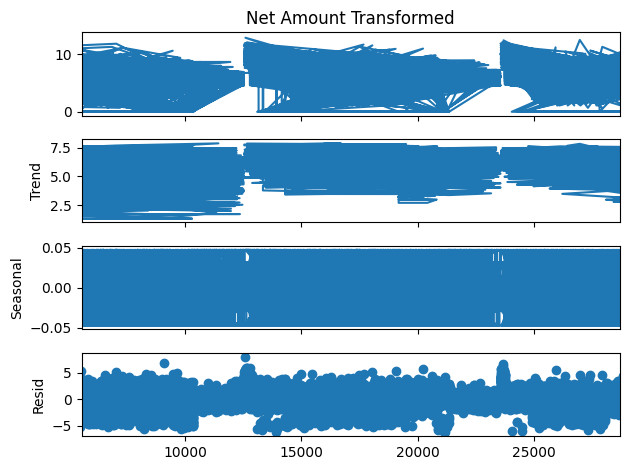

In [ ]:
result = seasonal_decompose(df['Net Amount Transformed'], model='additive', period=15)
result.plot()
plt.show()

Data isnt stationary at all we need to apply differencing to the data


In [ ]:
df['Differenced Net Amount'] = df['Net Amount Transformed'].diff().fillna(0)

In [ ]:
df

,Bill Date,Net Amount,day,month,year,Last Pay Mode,Net Amount Shifted,Net Amount Transformed,Differenced Net Amount
5552,2019-12-31 23:28:00,776,31,12,2019,PREPAID,777,6.655440,0.000000
1873,2019-12-31 23:28:00,2480,31,12,2019,TPA,2481,7.816417,1.160977
5871,2019-12-31 22:58:00,584,31,12,2019,TPA,585,6.371612,-1.444805
2295,2019-12-31 22:49:00,17,31,12,2019,CASH,18,2.890372,-3.481240
8194,2019-12-31 22:47:00,400,31,12,2019,CASH,401,5.993961,3.103590
...,...,...,...,...,...,...,...,...,...
23731,2019-10-11 01:03:00,2700,11,10,2019,PREPAID,2701,7.901377,3.105587
25405,2019-10-11 00:12:00,50,11,10,2019,CASH,51,3.931826,-3.969552
28230,2019-10-11 00:09:00,450,11,10,2019,CASH,451,6.111467,2.179642
29667,2019-10-11 00:07:00,100,11,10,2019,CASH,101,4.615121,-1.496347


In [ ]:
result = adfuller(df['Differenced Net Amount'].fillna(0)) # Drop NaN values from differencing

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
  print("Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
else:
  print("Weak evidence against null hypothesis(H0), time series has a unit root, indicating it is non-stationary")

ADF Statistic: -39.994170
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# result = seasonal_decompose(df['Net Amount'], model='additive', period=15)
# result.plot()
# plt.show()



1st order differencing has made the data stationary

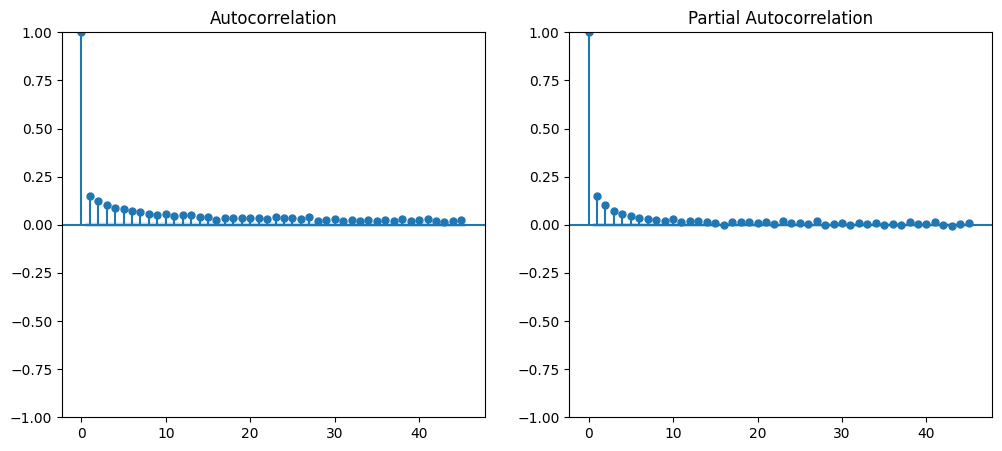

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df["Net Amount Transformed"].dropna(), ax=axes[0])
plot_pacf(df["Net Amount Transformed"].dropna(), ax=axes[1])

plt.show()


In [ ]:
df

,Bill Date,Net Amount,day,month,year,Last Pay Mode,Net Amount Shifted,Net Amount Transformed,Differenced Net Amount
5552,2019-12-31 23:28:00,776,31,12,2019,PREPAID,777,6.655440,0.000000
1873,2019-12-31 23:28:00,2480,31,12,2019,TPA,2481,7.816417,1.160977
5871,2019-12-31 22:58:00,584,31,12,2019,TPA,585,6.371612,-1.444805
2295,2019-12-31 22:49:00,17,31,12,2019,CASH,18,2.890372,-3.481240
8194,2019-12-31 22:47:00,400,31,12,2019,CASH,401,5.993961,3.103590
...,...,...,...,...,...,...,...,...,...
23731,2019-10-11 01:03:00,2700,11,10,2019,PREPAID,2701,7.901377,3.105587
25405,2019-10-11 00:12:00,50,11,10,2019,CASH,51,3.931826,-3.969552
28230,2019-10-11 00:09:00,450,11,10,2019,CASH,451,6.111467,2.179642
29667,2019-10-11 00:07:00,100,11,10,2019,CASH,101,4.615121,-1.496347


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

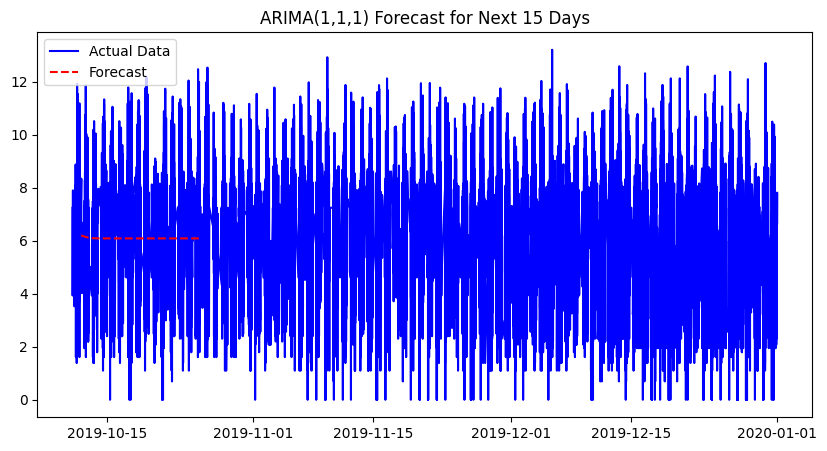

                     Forecasted_Value
Date                                 
2019-10-12 00:03:00          6.198557
2019-10-13 00:03:00          6.099705
2019-10-14 00:03:00          6.090367
2019-10-15 00:03:00          6.089485
2019-10-16 00:03:00          6.089401
2019-10-17 00:03:00          6.089393
2019-10-18 00:03:00          6.089393
2019-10-19 00:03:00          6.089393
2019-10-20 00:03:00          6.089393
2019-10-21 00:03:00          6.089393
2019-10-22 00:03:00          6.089393
2019-10-23 00:03:00          6.089393
2019-10-24 00:03:00          6.089393
2019-10-25 00:03:00          6.089393
2019-10-26 00:03:00          6.089393


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

df['Bill Date'] = pd.to_datetime(df['Bill Date'])
df.set_index('Bill Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df["Net Amount Transformed"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 15 days
forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates correctly
last_date = df.index[-1]  # Get the last date in the dataset
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

# Convert to DataFrame
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted_Value": forecast})
forecast_df.set_index("Date", inplace=True)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Net Amount Transformed"], label="Actual Data", color="blue")
plt.plot(forecast_df.index, forecast_df["Forecasted_Value"], label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("ARIMA(1,1,1) Forecast for Next 15 Days")
plt.show()

print(forecast_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

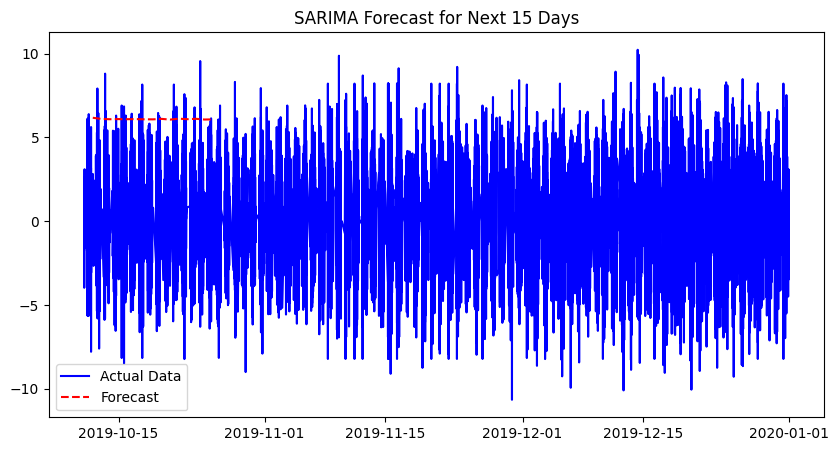

                     Forecasted_Value
Date                                 
2019-10-12 00:03:00          6.177211
2019-10-13 00:03:00          6.106634
2019-10-14 00:03:00          6.090102
2019-10-15 00:03:00          6.097543
2019-10-16 00:03:00          6.092241
2019-10-17 00:03:00          6.098213
2019-10-18 00:03:00          6.085537
2019-10-19 00:03:00          6.082425
2019-10-20 00:03:00          6.110998
2019-10-21 00:03:00          6.068262
2019-10-22 00:03:00          6.122507
2019-10-23 00:03:00          6.092099
2019-10-24 00:03:00          6.115404
2019-10-25 00:03:00          6.072256
2019-10-26 00:03:00          6.081421


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df' and 'Differenced Net Amount' are already defined

# Ensure 'Bill Date' is converted to DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)  # Convert index to DatetimeIndex

# Fit SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # Example: assuming weekly seasonality (replace with your values)

model = SARIMAX(df["Net Amount Transformed"], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast next 15 days
forecast_steps = 15
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Generate future dates correctly
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

# Convert to DataFrame
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted_Value": forecast_values})
forecast_df.set_index("Date", inplace=True)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Differenced Net Amount"], label="Actual Data", color="blue")
plt.plot(forecast_df.index, forecast_df["Forecasted_Value"], label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("SARIMA Forecast for Next 15 Days")
plt.show()

# Print forecasted values
print(forecast_df)

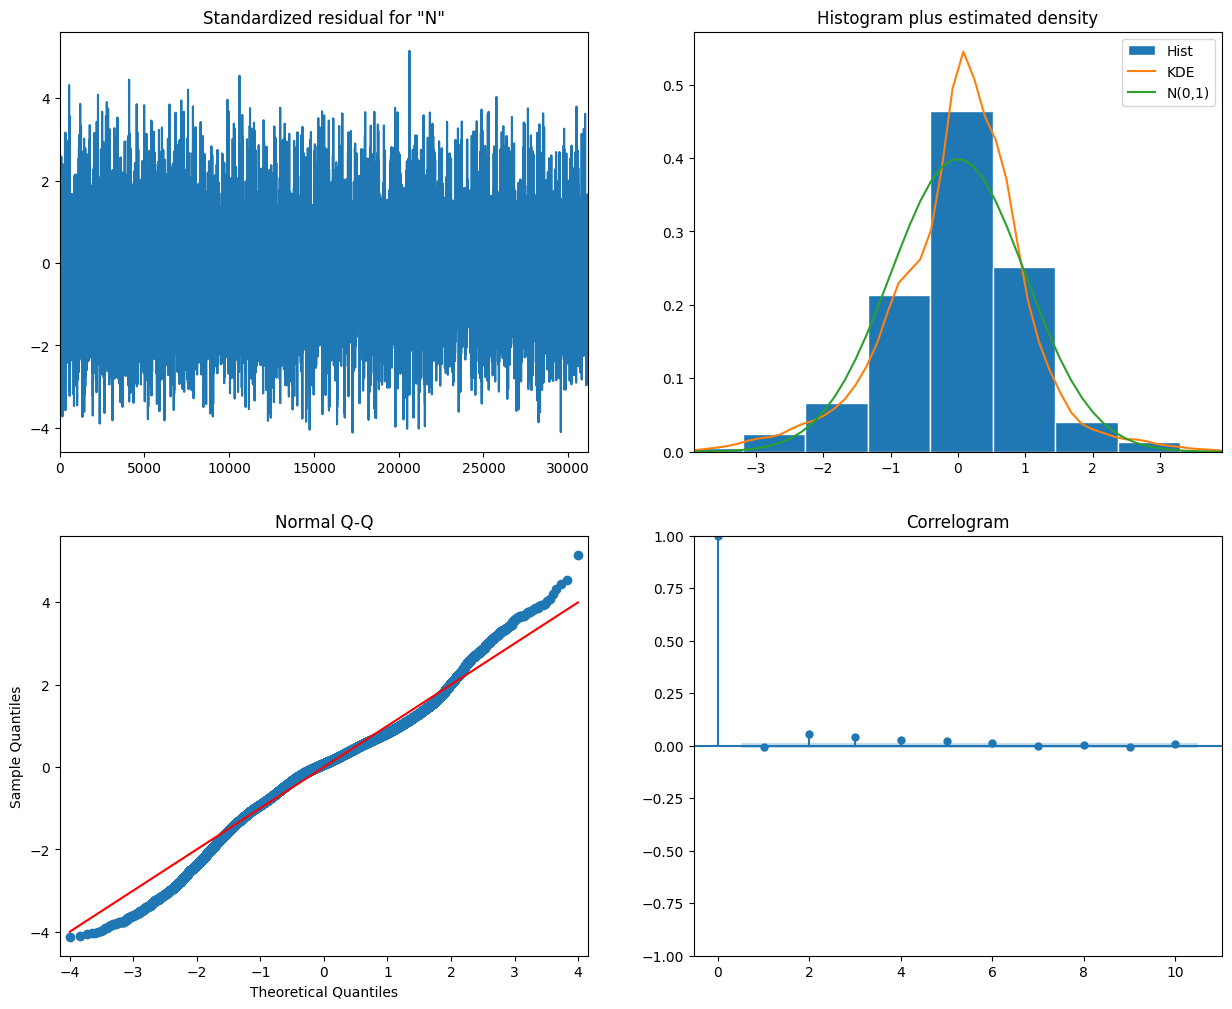

Ljung-Box test: L-statistic = l, p-value = l


In [ ]:
import statsmodels.api as sm  # Correct import here

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

# Ljung-Box test for residual autocorrelation
residuals = model_fit.resid
lbvalue, pvalue = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=False)
print(f"Ljung-Box test: L-statistic = {lbvalue[0]}, p-value = {pvalue[0]}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


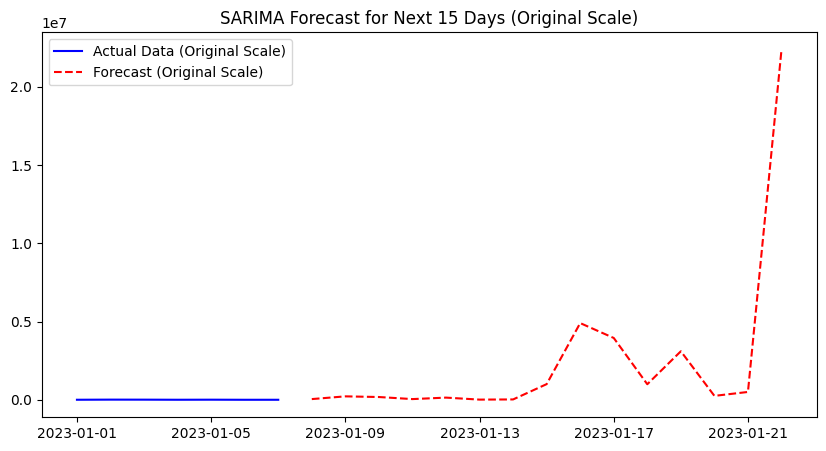

Forecasted Values (Original Scale):
            Forecasted_Value
Date                        
2023-01-08      4.472144e+04
2023-01-09      2.191351e+05
2023-01-10      1.766050e+05
2023-01-11      4.443076e+04
2023-01-12      1.386365e+05
2023-01-13      1.118036e+04
2023-01-14      2.236072e+04
2023-01-15      1.000004e+06
2023-01-16      4.900019e+06
2023-01-17      3.949015e+06
2023-01-18      9.935038e+05
2023-01-19      3.100012e+06
2023-01-20      2.500010e+05
2023-01-21      5.000019e+05
2023-01-22      2.236081e+07

Original Data (Original Scale):
            Net Amount Transformed
Date                              
2023-01-01                  2000.0
2023-01-02                  9800.0
2023-01-03                  7898.0
2023-01-04                  1987.0
2023-01-05                  6200.0
2023-01-06                   500.0
2023-01-07                  1000.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np


def sarima_forecast_original_scale(df, transformed_column, order, seasonal_order, forecast_steps):
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    model = SARIMAX(df[transformed_column], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_log_values = forecast.predicted_mean
    forecast_original_values = np.exp(forecast_log_values)

    last_date = df.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

    forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted_Value": forecast_original_values})
    forecast_df.set_index("Date", inplace=True)

    return forecast_df


def plot_sarima_forecast_original_scale(df, transformed_column, forecast_df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, np.exp(df[transformed_column]), label="Actual Data (Original Scale)", color="blue")
    plt.plot(forecast_df.index, forecast_df["Forecasted_Value"], label="Forecast (Original Scale)", color="red", linestyle="dashed")
    plt.legend()
    plt.title("SARIMA Forecast for Next 15 Days (Original Scale)")
    plt.show()

data = {'Net Amount Transformed': [np.log(2000), np.log(9800), np.log(7898), np.log(1987), np.log(6200), np.log(500), np.log(1000)], 'Date': pd.to_datetime(['2023-01-01','2023-01-02','2023-01-03','2023-01-04','2023-01-05','2023-01-06','2023-01-07'])}
df = pd.DataFrame(data)
df.set_index('Date', inplace = True)

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)
forecast_steps = 15

forecast_results = sarima_forecast_original_scale(df, "Net Amount Transformed", order, seasonal_order, forecast_steps)
plot_sarima_forecast_original_scale(df, "Net Amount Transformed", forecast_results)

print("Forecasted Values (Original Scale):")
print(forecast_results)

print("\nOriginal Data (Original Scale):")
print(pd.DataFrame(np.exp(df['Net Amount Transformed']), index = df.index))